**Importing breast cancer file for analysis**

 Upload your CSV file...


Saving breast-cancer.csv to breast-cancer.csv

 Successfully loaded 'breast-cancer.csv' into a DataFrame!

 Step 1: Removing duplicate rows...
No duplicate rows found.

 Step 2: Handling Missing Values...
No missing values detected.

🔹 Step 3: Standardizing target column...
Unique values after standardization: ['M' 'B']

🔹 Step 4: Feature and Target Separation
Classes found: ['B' 'M']

🔹 Step 5: Splitting data into train/test sets...
✅ Data Split Complete — Train: (455, 30), Test: (114, 30)


/tmp/ipython-input-1778140972.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis', order=pd.Series(y).unique())


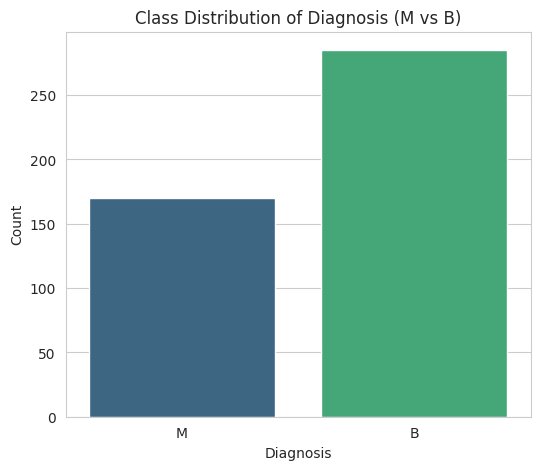

/tmp/ipython-input-1778140972.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Diagnosis', y=feature_name, data=plot_df, palette='muted', inner='quartile')


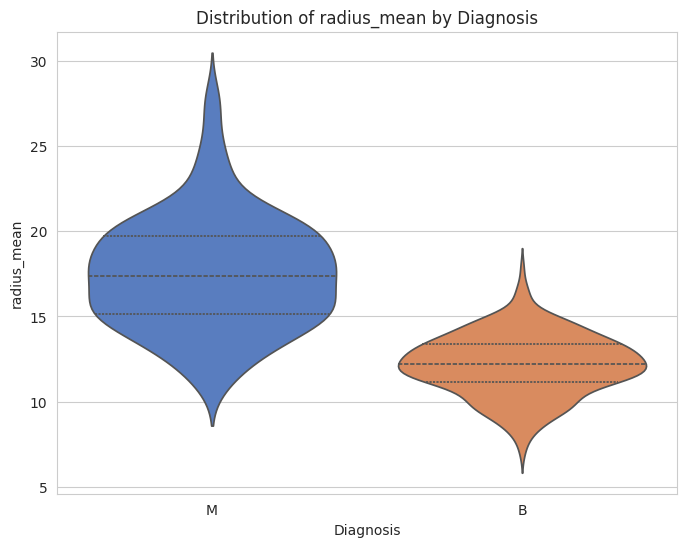

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

def upload_and_prepare_data():
    """
    Uploads a CSV file, cleans it (duplicates, missing values, label standardization),
    encodes target labels, and splits data into train/test sets.
    Returns:
        X_train, X_test, y_train, y_test, le, df
    """
    print(" Upload your CSV file...")
    uploaded = files.upload()

    # Load file
    for filename in uploaded.keys():
        df = pd.read_csv(io.BytesIO(uploaded[filename]))
        print(f"\n Successfully loaded '{filename}' into a DataFrame!")
        break

    # -------------------------------------------------------------------------
    # 1. DATA CLEANING
    # -------------------------------------------------------------------------
    print("\n Step 1: Removing duplicate rows...")
    num_duplicates = df.duplicated().sum()
    if num_duplicates > 0:
        df.drop_duplicates(inplace=True)
        print(f"Removed {num_duplicates} duplicates.")
    else:
        print("No duplicate rows found.")

    print("\n Step 2: Handling Missing Values...")
    missing_values_count = df.isnull().sum()
    missing_cols = missing_values_count[missing_values_count > 0]

    if not missing_cols.empty:
        numeric_cols = df.select_dtypes(include=np.number).columns
        categorical_cols = df.select_dtypes(include=['object', 'category']).columns

        for col in numeric_cols:
            if col in missing_cols.index:
                df[col].fillna(df[col].mean(), inplace=True)

        for col in categorical_cols:
            if col in missing_cols.index:
                df[col].fillna(df[col].mode()[0], inplace=True)

        print("Missing values imputed successfully.")
    else:
        print("No missing values detected.")

    print("\n🔹 Step 3: Standardizing target column...")
    if 'diagnosis' in df.columns and df['diagnosis'].dtype == 'object':
        df['diagnosis'] = df['diagnosis'].str.strip().str.upper()
        print(f"Unique values after standardization: {df['diagnosis'].unique()}")

    # -------------------------------------------------------------------------
    # 2. FEATURE SELECTION AND ENCODING
    # -------------------------------------------------------------------------
    print("\n🔹 Step 4: Feature and Target Separation")
    X = df.drop(['id', 'diagnosis'], axis=1)
    y = df['diagnosis']

    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    print(f"Classes found: {le.classes_}")

    # -------------------------------------------------------------------------
    # 3. TRAIN-TEST SPLIT
    # -------------------------------------------------------------------------
    print("\n🔹 Step 5: Splitting data into train/test sets...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
    )

    print(f"✅ Data Split Complete — Train: {X_train.shape}, Test: {X_test.shape}")
    return X_train, X_test, y_train, y_test, le, df

# =====================================================================
# Example: Using the function
# =====================================================================
X_train, X_test, y_train, y_test, le, df = upload_and_prepare_data()

def visualize_data(df, X, y):
    sns.set_style("whitegrid")
    feature_name = X.columns[0]

    # 1. Class Distribution
    plt.figure(figsize=(6, 5))
    sns.countplot(x=y, palette='viridis', order=pd.Series(y).unique())
    plt.title('Class Distribution of Diagnosis (M vs B)')
    plt.xlabel('Diagnosis')
    plt.ylabel('Count')
    plt.show()

    # 2. Feature Distribution
    plot_df = X[[feature_name]].copy()
    plot_df['Diagnosis'] = y
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Diagnosis', y=feature_name, data=plot_df, palette='muted', inner='quartile')
    plt.title(f'Distribution of {feature_name} by Diagnosis')
    plt.show()

visualize_data(df, X_train, le.inverse_transform(y_train))


**Logistic Regression **


LOGISTIC REGRESSION RESULTS
Accuracy: 0.9386
ROC-AUC: 0.9940

Classification Report:
               precision    recall  f1-score   support

           B       0.92      0.99      0.95        72
           M       0.97      0.86      0.91        42

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


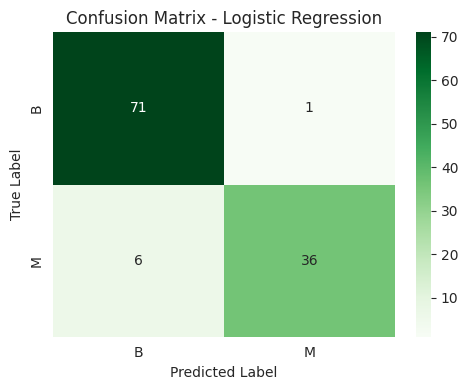

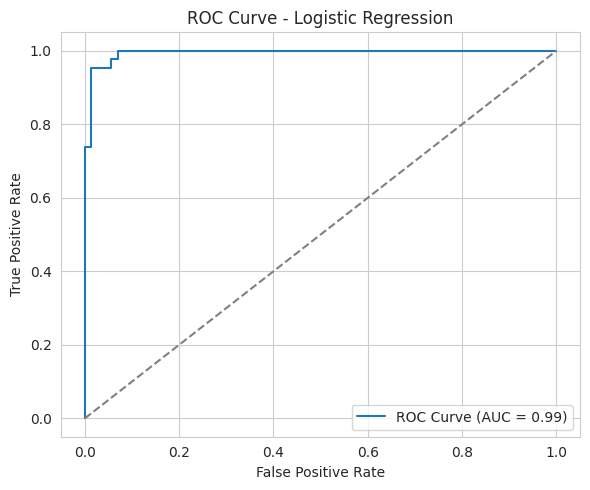

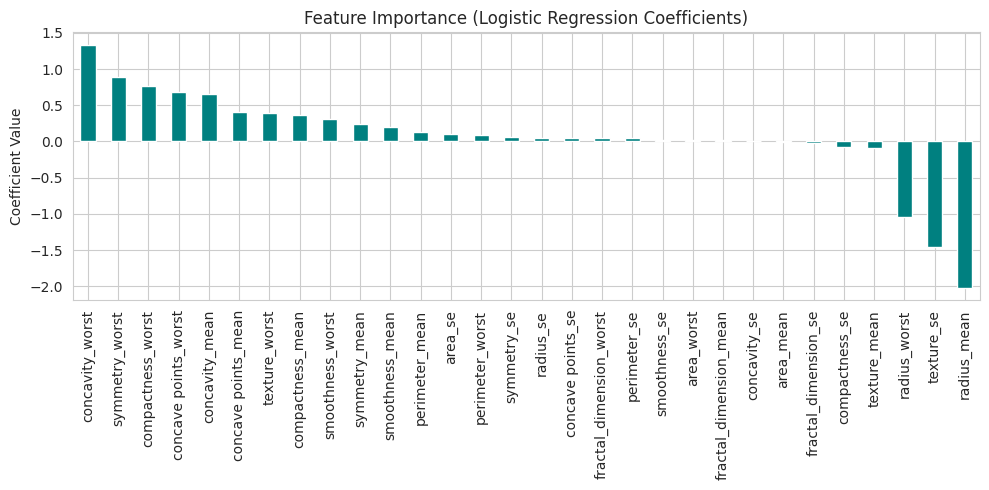

In [ ]:
# =========================================================================
# 4. LOGISTIC REGRESSION MODEL
# =========================================================================

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Initialize and Train the Model ---
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# --- Make Predictions ---
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# --- Evaluate the Model ---
print("\n===============================")
print("LOGISTIC REGRESSION RESULTS")
print("===============================")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# --- ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.tight_layout()
plt.show()

# --- Feature Importance ---
importance = pd.Series(log_reg.coef_[0], index=X_train.columns)
plt.figure(figsize=(10,5))
importance.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.ylabel("Coefficient Value")
plt.tight_layout()
plt.show()



**Random Forest **


RANDOM FOREST RESULTS
Accuracy: 0.9649
ROC-AUC: 0.9942

Classification Report:
               precision    recall  f1-score   support

           B       0.95      1.00      0.97        72
           M       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



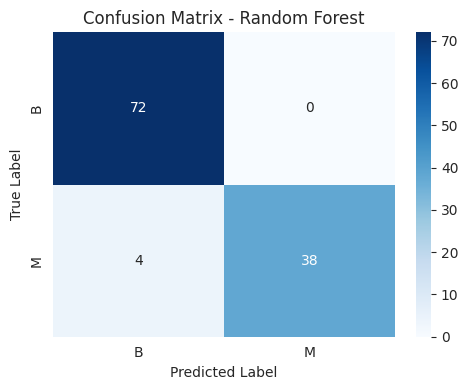

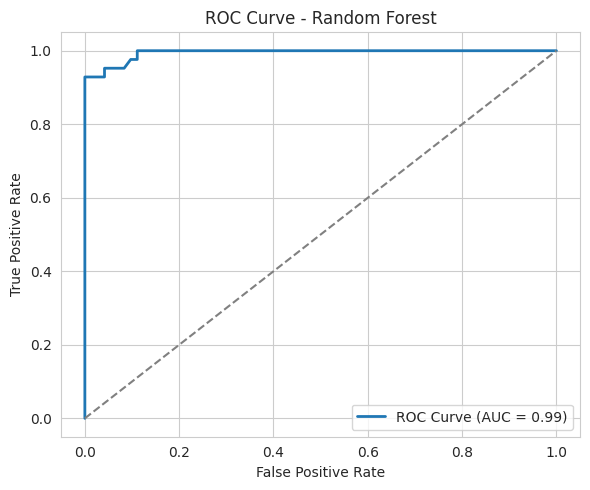

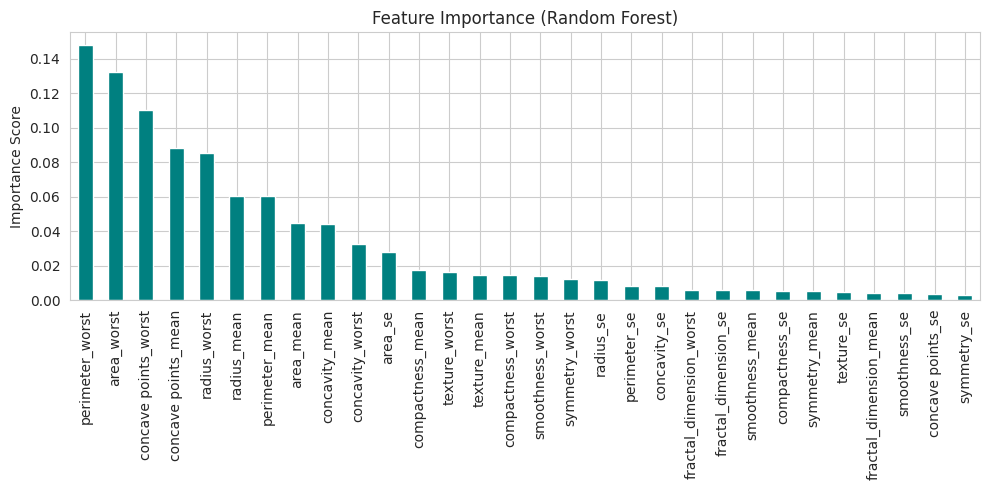

In [ ]:
# =========================================================================
# 4. RANDOM FOREST CLASSIFIER MODEL
# =========================================================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Initialize and Train the Model ---
rf_clf = RandomForestClassifier(
    n_estimators=200,        # number of trees
    max_depth=None,          # can be tuned to prevent overfitting
    random_state=42,
    n_jobs=-1                # use all CPU cores
)
rf_clf.fit(X_train, y_train)

# --- Make Predictions ---
y_pred = rf_clf.predict(X_test)
y_pred_proba = rf_clf.predict_proba(X_test)[:, 1]

# --- Evaluate the Model ---
print("\n===============================")
print("RANDOM FOREST RESULTS")
print("===============================")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# --- ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.tight_layout()
plt.show()

# --- Feature Importance ---
importance = pd.Series(rf_clf.feature_importances_, index=X_train.columns)
plt.figure(figsize=(10,5))
importance.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title("Feature Importance (Random Forest)")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


**uncorrelated data**

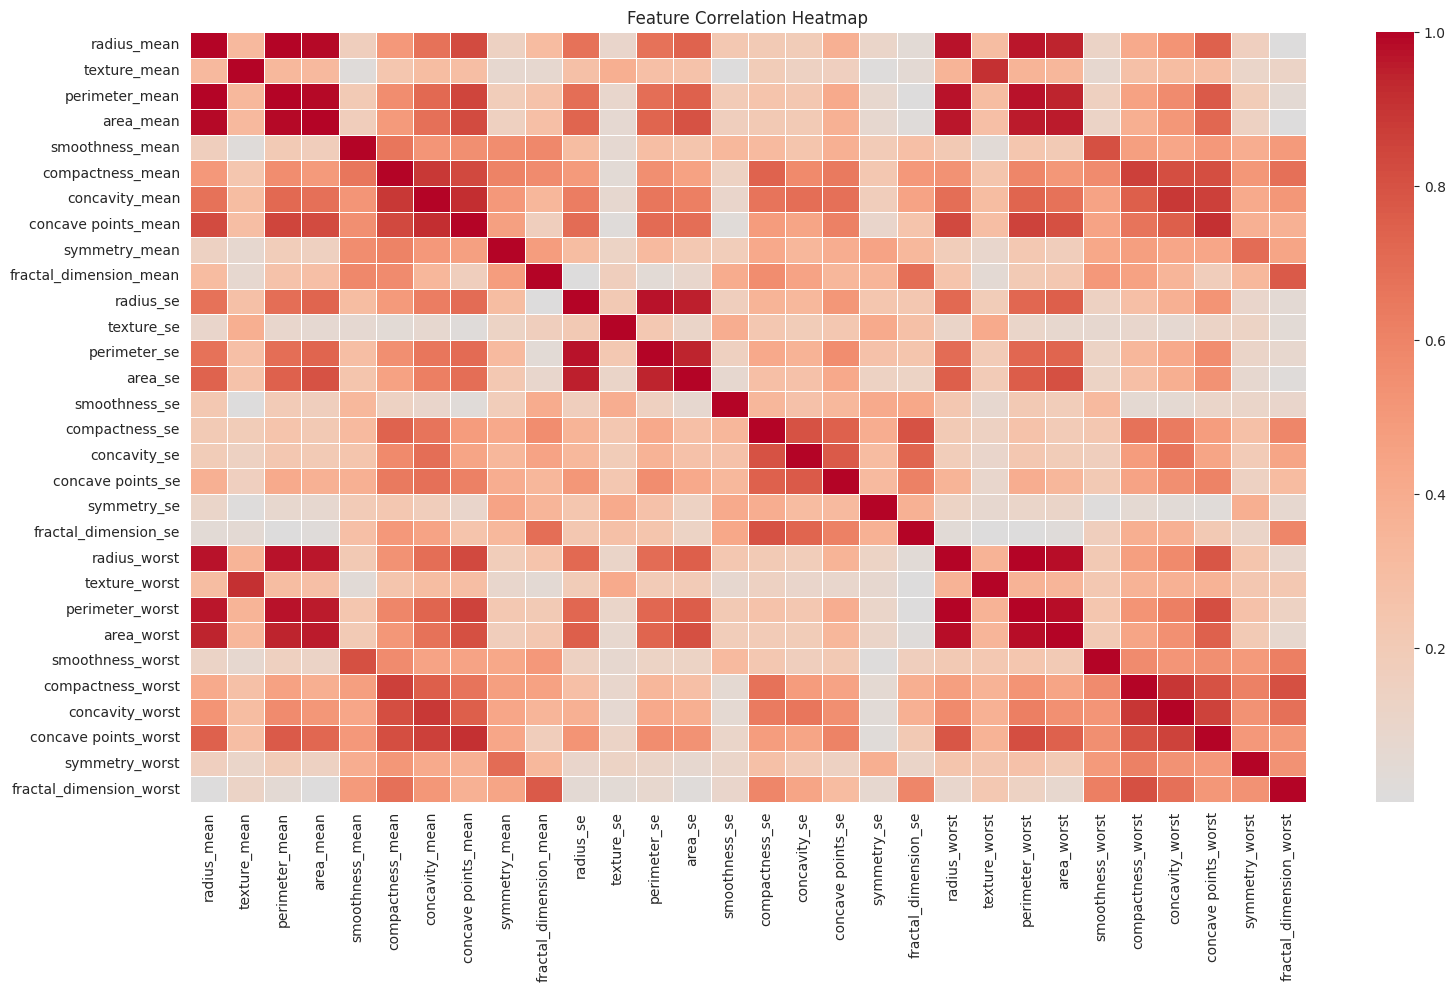

Correlation threshold: 0.8
Number of correlated features: 17
Number of uncorrelated features: 13

Highly correlated features:
 ['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'concavity_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'fractal_dimension_worst']


In [ ]:
def separate_correlated_features(df, threshold=1):


    # Only use numeric columns
    X = df.select_dtypes(include=np.number)

    # Compute correlation matrix
    corr_matrix = X.corr().abs()

    # Visualize correlation heatmap
    plt.figure(figsize=(18, 10))
    sns.heatmap(corr_matrix, cmap='coolwarm', center=0, linewidths=0.5)
    plt.title("Feature Correlation Heatmap")
    plt.show()

    # Extract upper triangle of correlation matrix
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Identify highly correlated features
    correlated_features = [
        col for col in upper_tri.columns if any(upper_tri[col] > threshold)
    ]

    # Separate correlated and uncorrelated features
    correlated_data = X[correlated_features]
    uncorrelated_data = X.drop(columns=correlated_features)

    # Summary
    print("======================================")
    print(f"Correlation threshold: {threshold}")
    print("======================================")
    print(f"Number of correlated features: {len(correlated_features)}")
    print(f"Number of uncorrelated features: {uncorrelated_data.shape[1]}")
    print("\nHighly correlated features:\n", correlated_features)
    print("======================================")

    return correlated_features, correlated_data, uncorrelated_data
    X_train, X_test, y_train, y_test, le, df = upload_and_prepare_data()
correlated_features, correlated_data, uncorrelated_data = separate_correlated_features(
    df.drop(['id', 'diagnosis'], axis=1), threshold=0.8
)



***Random forest and logistic regression on uncorrelated data ***


🔹 Training Logistic Regression...
✅ Logistic Regression Accuracy: 0.8947

Classification Report (LR):
               precision    recall  f1-score   support

           0       0.87      0.99      0.92        72
           1       0.97      0.74      0.84        42

    accuracy                           0.89       114
   macro avg       0.92      0.86      0.88       114
weighted avg       0.90      0.89      0.89       114



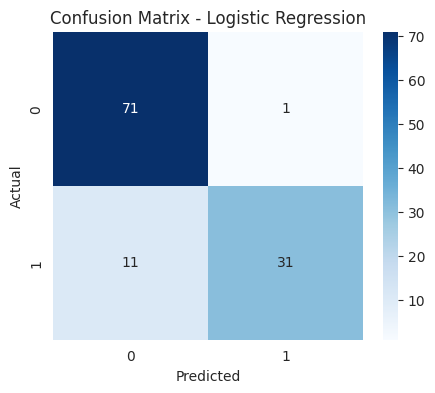


🔹 Training Random Forest Classifier...
✅ Random Forest Accuracy: 0.9123

Classification Report (RF):
               precision    recall  f1-score   support

           0       0.91      0.96      0.93        72
           1       0.92      0.83      0.88        42

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



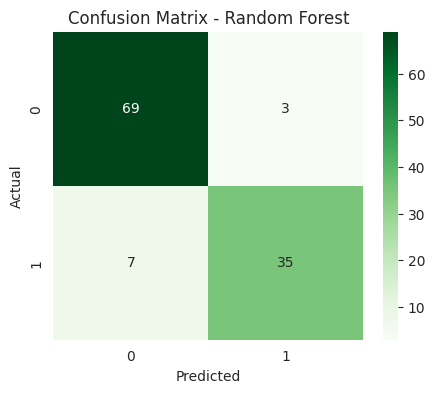


================= MODEL COMPARISON =================
Logistic Regression Accuracy : 0.8947
Random Forest Accuracy        : 0.9123
👉 Random Forest performs better.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    """
    Trains Logistic Regression and Random Forest on uncorrelated features
    and compares their performance.
    """

    print("\n🔹 Training Logistic Regression...")
    lr_clf = LogisticRegression(max_iter=2000, solver='liblinear')
    lr_clf.fit(X_train, y_train)
    y_pred_lr = lr_clf.predict(X_test)

    lr_acc = accuracy_score(y_test, y_pred_lr)
    print(f"✅ Logistic Regression Accuracy: {lr_acc:.4f}")
    print("\nClassification Report (LR):\n", classification_report(y_test, y_pred_lr))

    # Confusion Matrix - Logistic Regression
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - Logistic Regression')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ---------------------------------------------------------------
    print("\n🔹 Training Random Forest Classifier...")
    rf_clf = RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        max_depth=None,
        min_samples_split=2,
        n_jobs=-1
    )
    rf_clf.fit(X_train, y_train)
    y_pred_rf = rf_clf.predict(X_test)

    rf_acc = accuracy_score(y_test, y_pred_rf)
    print(f"✅ Random Forest Accuracy: {rf_acc:.4f}")
    print("\nClassification Report (RF):\n", classification_report(y_test, y_pred_rf))

    # Confusion Matrix - Random Forest
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
    plt.title('Confusion Matrix - Random Forest')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Compare Models
    print("\n================= MODEL COMPARISON =================")
    print(f"Logistic Regression Accuracy : {lr_acc:.4f}")
    print(f"Random Forest Accuracy        : {rf_acc:.4f}")
    if rf_acc > lr_acc:
        print("👉 Random Forest performs better.")
    elif rf_acc < lr_acc:
        print("👉 Logistic Regression performs better.")
    else:
        print("👉 Both models perform equally well.")

# =====================================================================
# Example: Apply to Uncorrelated Data
# =====================================================================

# (Assuming you already have correlated_data, uncorrelated_data from previous step)
X_train_uncorr = X_train[uncorrelated_data.columns]
X_test_uncorr = X_test[uncorrelated_data.columns]

# Train and evaluate models
train_and_evaluate_models(X_train_uncorr, X_test_uncorr, y_train, y_test)


**compare which has best accuracy**


🔹 Training Logistic Regression...


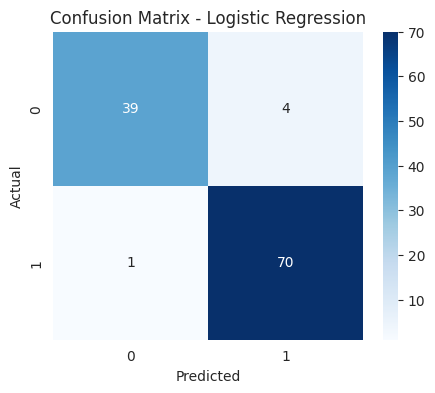


🔹 Training Random Forest Classifier...


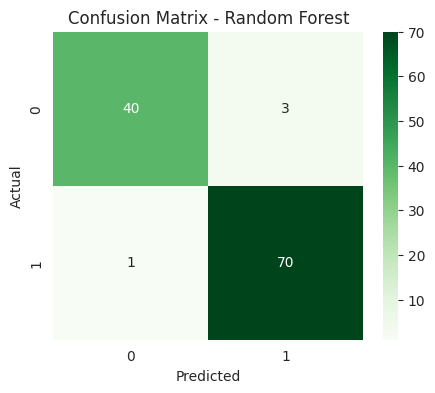


================= MODEL COMPARISON TABLE =================
              Model  Accuracy  Precision   Recall  F1-Score
Logistic Regression  0.956140   0.956905 0.956140  0.955801
      Random Forest  0.964912   0.965205 0.964912  0.964738


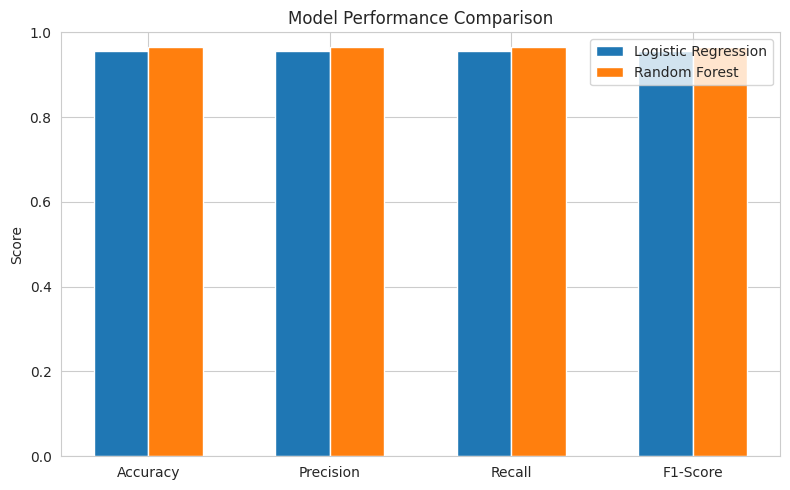


================= BEST MODEL =================
👉 Random Forest performs better.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    """
    Trains Logistic Regression and Random Forest,
    compares their performance visually and in a table.
    """

    # ==========================================================
    # Logistic Regression
    # ==========================================================
    print("\n🔹 Training Logistic Regression...")
    lr_clf = LogisticRegression(max_iter=2000, solver='liblinear')
    lr_clf.fit(X_train, y_train)
    y_pred_lr = lr_clf.predict(X_test)

    lr_acc = accuracy_score(y_test, y_pred_lr)
    lr_prec = precision_score(y_test, y_pred_lr, average='weighted')
    lr_rec = recall_score(y_test, y_pred_lr, average='weighted')
    lr_f1 = f1_score(y_test, y_pred_lr, average='weighted')

    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - Logistic Regression')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ==========================================================
    # Random Forest
    # ==========================================================
    print("\n🔹 Training Random Forest Classifier...")
    rf_clf = RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        max_depth=None,
        min_samples_split=2,
        n_jobs=-1
    )
    rf_clf.fit(X_train, y_train)
    y_pred_rf = rf_clf.predict(X_test)

    rf_acc = accuracy_score(y_test, y_pred_rf)
    rf_prec = precision_score(y_test, y_pred_rf, average='weighted')
    rf_rec = recall_score(y_test, y_pred_rf, average='weighted')
    rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
    plt.title('Confusion Matrix - Random Forest')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ==========================================================
    # Comparison Table
    # ==========================================================
    results = pd.DataFrame({
        'Model': ['Logistic Regression', 'Random Forest'],
        'Accuracy': [lr_acc, rf_acc],
        'Precision': [lr_prec, rf_prec],
        'Recall': [lr_rec, rf_rec],
        'F1-Score': [lr_f1, rf_f1]
    })

    print("\n================= MODEL COMPARISON TABLE =================")
    print(results.to_string(index=False))

    # ==========================================================
    # Comparison Graph
    # ==========================================================
    plt.figure(figsize=(8, 5))
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    x = range(len(metrics))

    plt.bar([i - 0.15 for i in x], results.loc[0, metrics], width=0.3, label='Logistic Regression')
    plt.bar([i + 0.15 for i in x], results.loc[1, metrics], width=0.3, label='Random Forest')

    plt.xticks(x, metrics)
    plt.ylabel('Score')
    plt.title('Model Performance Comparison')
    plt.legend()
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

    # ==========================================================
    # Model Decision
    # ==========================================================
    print("\n================= BEST MODEL =================")
    if rf_acc > lr_acc:
        print("👉 Random Forest performs better.")
    elif rf_acc < lr_acc:
        print("👉 Logistic Regression performs better.")
    else:
        print("👉 Both models perform equally well.")


# =====================================================================
# ✅ Example Run
# =====================================================================
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_and_evaluate_models(X_train, X_test, y_train, y_test)


Logistic Regression Accuracy: 0.6228
Random Forest Accuracy: 0.5965


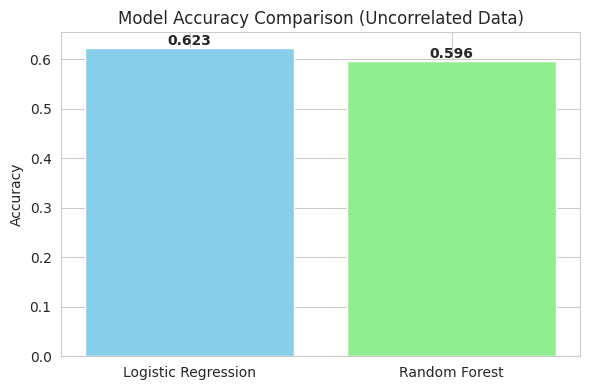

Logistic Regression - Train Accuracy: 0.6286
Logistic Regression - Test Accuracy:  0.6228
Random Forest      - Train Accuracy: 1.0000
Random Forest      - Test Accuracy:  0.5965


RandomForestClassifier(max_depth=6, min_samples_split=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# --- Logistic Regression ---
lr = LogisticRegression(max_iter=2000, solver='liblinear', random_state=42)
lr.fit(X_train_uncorr, y_train)
lr_acc = accuracy_score(y_test, lr.predict(X_test_uncorr))

# --- Random Forest ---
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train_uncorr, y_train)
rf_acc = accuracy_score(y_test, rf.predict(X_test_uncorr))

# --- Print and Compare ---
print(f"Logistic Regression Accuracy: {lr_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")

# --- Plot Accuracy Comparison ---
models = ['Logistic Regression', 'Random Forest']
accuracies = [lr_acc, rf_acc]

plt.figure(figsize=(6,4))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.title('Model Accuracy Comparison (Uncorrelated Data)')
plt.ylabel('Accuracy')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.005, f"{v:.3f}", ha='center', fontweight='bold')
plt.tight_layout()
plt.show()
# Check training accuracy too
train_acc_lr = lr.score(X_train_uncorr, y_train)
train_acc_rf = rf.score(X_train_uncorr, y_train)

print(f"Logistic Regression - Train Accuracy: {train_acc_lr:.4f}")
print(f"Logistic Regression - Test Accuracy:  {lr_acc:.4f}")
print(f"Random Forest      - Train Accuracy: {train_acc_rf:.4f}")
print(f"Random Forest      - Test Accuracy:  {rf_acc:.4f}")

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,          # limit tree depth
    min_samples_split=5,  # prevent small splits
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_uncorr, y_train)



**Random Forest and GridSearchCV**

Fitting 5 folds for each of 216 candidates, totalling 1080 fits

✅ Best Parameters Found:
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.6330

🎯 Test Accuracy with Tuned Random Forest: 0.5965


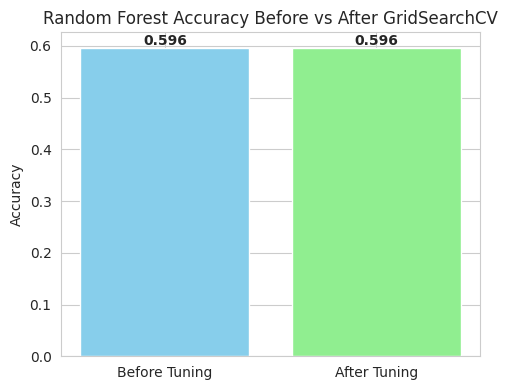

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# ============================================================
# 1️⃣ Define the parameter grid (search space)
# ============================================================
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# ============================================================
# 2️⃣ Initialize Random Forest and GridSearchCV
# ============================================================
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                # 5-fold cross-validation
    scoring='accuracy',  # optimize for accuracy
    verbose=2,
    n_jobs=-1
)

# ============================================================
# 3️⃣ Fit GridSearchCV on your uncorrelated training data
# ============================================================
grid_search.fit(X_train_uncorr, y_train)

print("\n✅ Best Parameters Found:")
print(grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# ============================================================
# 4️⃣ Evaluate the best model on your test data
# ============================================================
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test_uncorr)
test_acc = accuracy_score(y_test, y_pred_best)

print(f"\n🎯 Test Accuracy with Tuned Random Forest: {test_acc:.4f}")

# ============================================================
# 5️⃣ Optional — Compare before vs after tuning
# ============================================================
# Assuming rf_acc is your previous Random Forest test accuracy
before_acc = rf_acc  # from your earlier model
after_acc = test_acc

plt.figure(figsize=(5,4))
plt.bar(['Before Tuning', 'After Tuning'], [before_acc, after_acc], color=['skyblue', 'lightgreen'])
plt.title('Random Forest Accuracy Before vs After GridSearchCV')
plt.ylabel('Accuracy')
for i, v in enumerate([before_acc, after_acc]):
    plt.text(i, v + 0.005, f"{v:.3f}", ha='center', fontweight='bold')
plt.tight_layout()
plt.show()


**Support vector regressor**

 Support Vector Regressor Results
Mean Squared Error (MSE): 0.0405
R² Score: 0.8277
Converted Classification Accuracy: 0.9474


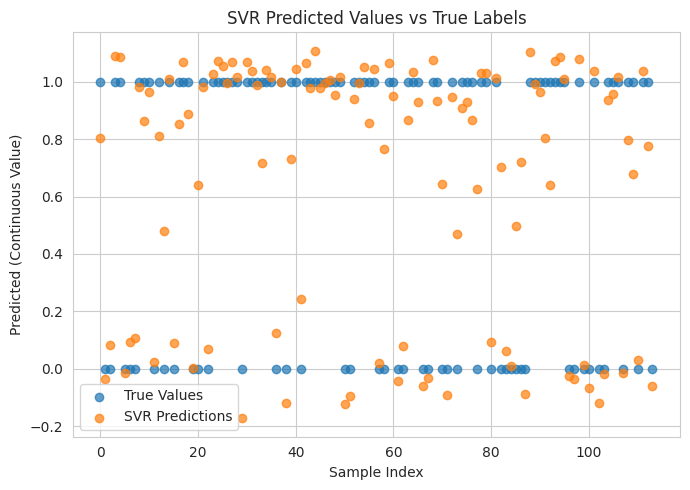

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# ================================================================
# 1 Train the Support Vector Regressor
# ================================================================
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

# ================================================================
# 2 Predict on Test Data
# ================================================================
y_pred_reg = svr.predict(X_test)

# Convert continuous predictions to binary (0 or 1)
y_pred_class = np.where(y_pred_reg >= 0.5, 1, 0)

# ================================================================
# 3 Evaluate Performance
# ================================================================
mse = mean_squared_error(y_test, y_pred_reg)
r2 = r2_score(y_test, y_pred_reg)
acc = accuracy_score(y_test, y_pred_class)

print(" Support Vector Regressor Results")
print("===================================")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Converted Classification Accuracy: {acc:.4f}")

# ================================================================
# 4 Visualize Predicted vs True Values
# ================================================================
plt.figure(figsize=(7,5))
plt.scatter(range(len(y_test)), y_test, label='True Values', alpha=0.7)
plt.scatter(range(len(y_test)), y_pred_reg, label='SVR Predictions', alpha=0.7)
plt.title("SVR Predicted Values vs True Labels")
plt.xlabel("Sample Index")
plt.ylabel("Predicted (Continuous Value)")
plt.legend()
plt.tight_layout()
plt.show()


 Support Vector Regressor Results
Mean Squared Error (MSE): 7946.0108
R2 Score: 0.0840
Converted Classification Accuracy: 0.8500


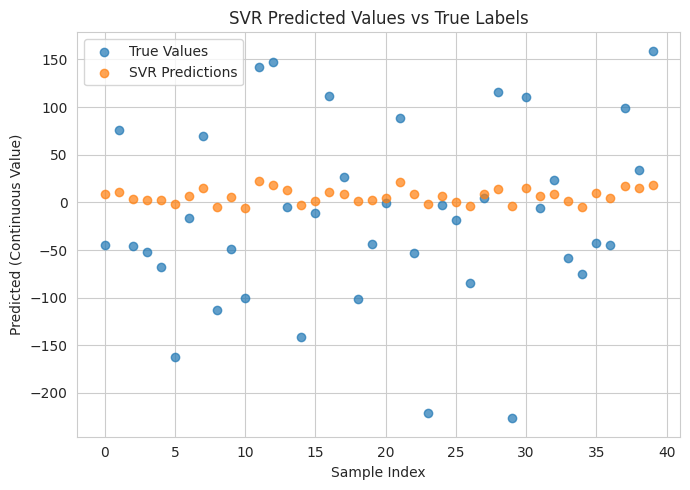

In [ ]:
# ================================================================
# 📘 Support Vector Regressor Example – No Upload Required
# ================================================================

from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# ================================================================
# 1️⃣ Generate Synthetic Regression Data
# ================================================================
X, y = make_regression(
    n_samples=200,       # number of samples
    n_features=5,        # number of features
    noise=10,            # noise level
    random_state=42
)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ================================================================
# 2️⃣ Scale Features (important for SVR)
# ================================================================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ================================================================
# 3️⃣ Train the SVR Model
# ================================================================
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

# ================================================================
# 4️⃣ Predict on Test Data
# ================================================================
y_pred_reg = svr.predict(X_test)

# Optional: Convert continuous predictions to binary (for classification-style accuracy)
y_pred_class = np.where(y_pred_reg >= np.median(y_pred_reg), 1, 0)
y_test_class = np.where(y_test >= np.median(y_test), 1, 0)

# ================================================================
# 5️⃣ Evaluate Performance
# ================================================================
mse = mean_squared_error(y_test, y_pred_reg)
r2 = r2_score(y_test, y_pred_reg)
acc = accuracy_score(y_test_class, y_pred_class)

print(" Support Vector Regressor Results")
print("===================================")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R2 Score: {r2:.4f}")
print(f"Converted Classification Accuracy: {acc:.4f}")

# ================================================================
# 6️⃣ Visualization
# ================================================================
plt.figure(figsize=(7,5))
plt.scatter(range(len(y_test)), y_test, label='True Values', alpha=0.7)
plt.scatter(range(len(y_test)), y_pred_reg, label='SVR Predictions', alpha=0.7)
plt.title("SVR Predicted Values vs True Labels")
plt.xlabel("Sample Index")
plt.ylabel("Predicted (Continuous Value)")
plt.legend()
plt.tight_layout()
plt.show()


**Support vector machine**


📊 SVM Model Performance
✅ Accuracy: 0.9833

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.97      1.00      0.99        33

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



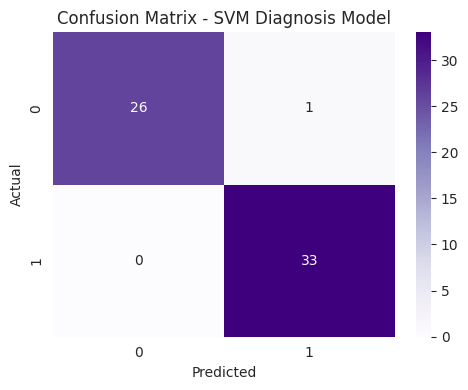

In [ ]:
# ================================================================
# 🧠 Medical Diagnosis Example using SVM (No Data Upload Needed)
# ================================================================

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# ================================================================
# 1️⃣ Generate Synthetic Diagnostic Data
# ================================================================
# This creates fake "diagnosis" data similar to breast cancer dataset
X, y = make_classification(
    n_samples=300,       # number of samples
    n_features=10,       # number of features (like radius, texture, etc.)
    n_informative=6,     # number of informative features
    n_redundant=2,
    n_classes=2,         # binary classification (Benign / Malignant)
    random_state=42
)

# ================================================================
# 2️⃣ Split Dataset
# ================================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ================================================================
# 3️⃣ Standardize Features (very important for SVM)
# ================================================================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ================================================================
# 4️⃣ Train Support Vector Machine
# ================================================================
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm_clf.fit(X_train, y_train)

# ================================================================
# 5️⃣ Predict and Evaluate
# ================================================================
y_pred = svm_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("\n📊 SVM Model Performance")
print("=====================================")
print(f"✅ Accuracy: {acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ================================================================
# 6️⃣ Confusion Matrix Visualization
# ================================================================
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - SVM Diagnosis Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


**K-Nearest Neighbors**

📊 K-Nearest Neighbors Model Results
✅ Accuracy: 0.9500

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        27
           1       0.97      0.94      0.95        33

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



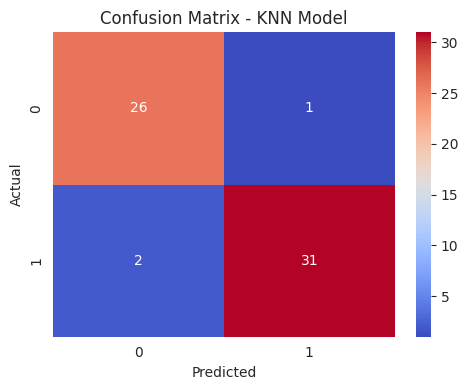

k=3 → Accuracy: 0.9667
k=5 → Accuracy: 0.9500
k=7 → Accuracy: 0.9500
k=9 → Accuracy: 0.9667
k=11 → Accuracy: 0.9500


In [ ]:
# ================================================================
# 🧠 K-Nearest Neighbors (KNN) for Diagnosis
# ================================================================
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ================================================================
# 1️⃣ Train the KNN Model
# ================================================================
knn_clf = KNeighborsClassifier(
    n_neighbors=5,      # you can tune this (try 3, 5, 7, 9)
    metric='minkowski', # default distance measure
    p=2                 # p=2 means Euclidean distance
)
knn_clf.fit(X_train, y_train)

# ================================================================
# 2️⃣ Predict on Test Data
# ================================================================
y_pred_knn = knn_clf.predict(X_test)

# ================================================================
# 3️⃣ Evaluate Performance
# ================================================================
acc_knn = accuracy_score(y_test, y_pred_knn)
print("📊 K-Nearest Neighbors Model Results")
print("===================================")
print(f"✅ Accuracy: {acc_knn:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

# ================================================================
# 4️⃣ Confusion Matrix Visualization
# ================================================================
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn),
            annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix - KNN Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

for k in [3, 5, 7, 9, 11]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    print(f"k={k} → Accuracy: {model.score(X_test, y_test):.4f}")



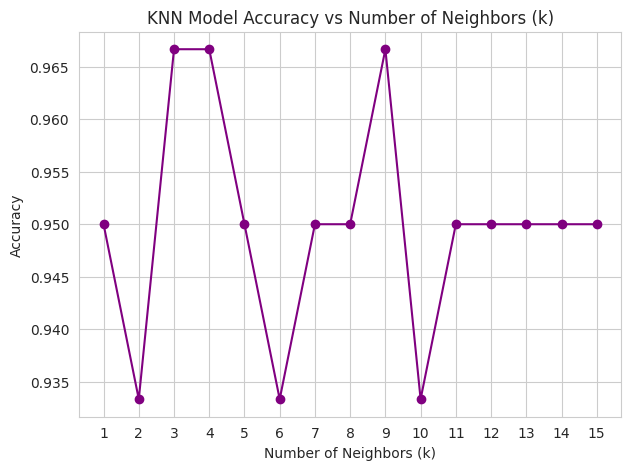

📊 K-Nearest Neighbors Model Results
✅ Best K: 3
✅ Accuracy: 0.9667

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       1.00      0.94      0.97        33

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



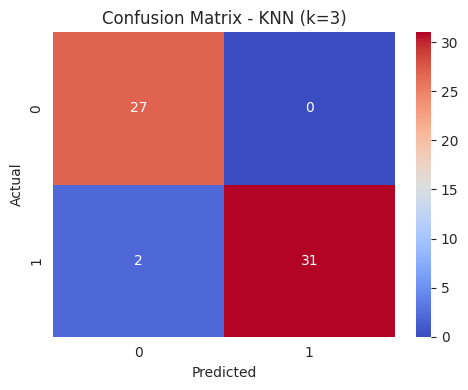

In [ ]:
# ================================================================
# 🧠 K-Nearest Neighbors (KNN) for Diagnosis + Graphs
# ================================================================
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ================================================================
# 1️⃣ Find Best 'k' Value
# ================================================================
k_values = range(1, 16)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot Accuracy vs K
plt.figure(figsize=(7,5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='purple')
plt.title("KNN Model Accuracy vs Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# ================================================================
# 2️⃣ Train Final Model with Best K
# ================================================================
best_k = k_values[accuracies.index(max(accuracies))]
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_knn = knn_best.predict(X_test)

# ================================================================
# 3️⃣ Evaluate Model
# ================================================================
acc_knn = accuracy_score(y_test, y_pred_knn)
print("📊 K-Nearest Neighbors Model Results")
print("===================================")
print(f"✅ Best K: {best_k}")
print(f"✅ Accuracy: {acc_knn:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

# ================================================================
# 4️⃣ Confusion Matrix Visualization
# ================================================================
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn),
            annot=True, fmt='d', cmap='coolwarm')
plt.title(f"Confusion Matrix - KNN (k={best_k})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


**Neural Network**

In [ ]:
# ================================================================
# 📂 Upload and Prepare Data
# ================================================================
import pandas as pd
import numpy as np
from google.colab import files
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Upload CSV file
uploaded = files.upload()

for filename in uploaded.keys():
    df = pd.read_csv(io.BytesIO(uploaded[filename]))
    print(f"\n✅ Loaded '{filename}' successfully!")
    print(df.head())

# ================================================================
# 🧹 Basic Cleaning (you can customize this if needed)
# ================================================================
df = df.dropna().drop_duplicates()

# Identify features and target
target_col = 'diagnosis'  # 🔹 change this if your label column has a different name
X = df.drop(columns=[target_col])
y = df[target_col]

# Encode target labels (e.g., M → 1, B → 0)
le = LabelEncoder()
y = le.fit_transform(y)

# Normalize feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("\n✅ Data Prepared Successfully!")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")


Saving breast-cancer.csv to breast-cancer.csv

✅ Loaded 'breast-cancer.csv' successfully!
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.19

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6850 - loss: 0.5999 - val_accuracy: 0.9298 - val_loss: 0.2421
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9259 - loss: 0.2334 - val_accuracy: 0.9561 - val_loss: 0.1445
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9671 - loss: 0.1406 - val_accuracy: 0.9561 - val_loss: 0.1115
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9844 - loss: 0.1010 - val_accuracy: 0.9649 - val_loss: 0.1006
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9768 - loss: 0.0814 - val_accuracy: 0.9561 - val_loss: 0.0927
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9884 - loss: 0.0722 - val_accuracy: 0.9737 - val_loss: 0.0897
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9744 - loss: 0.0968 - val_accuracy: 0.9561 - val_loss: 0.0833
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9872 - loss: 0.0508 - val_accuracy: 0.9649 - val_loss: 0.0813
Ep

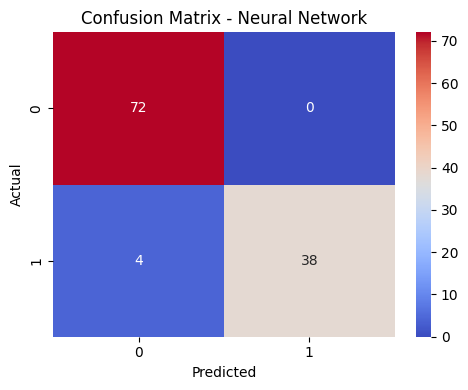

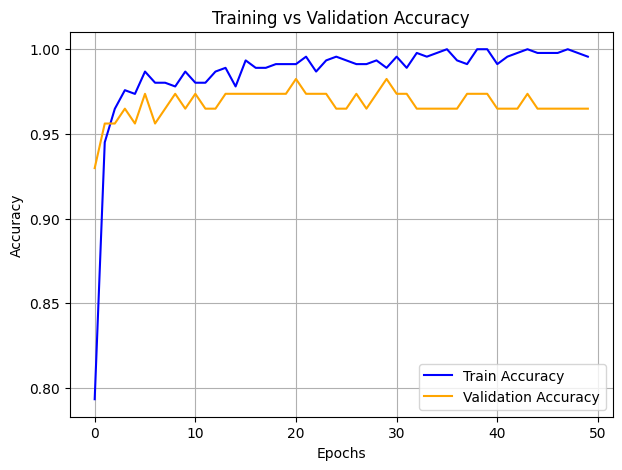

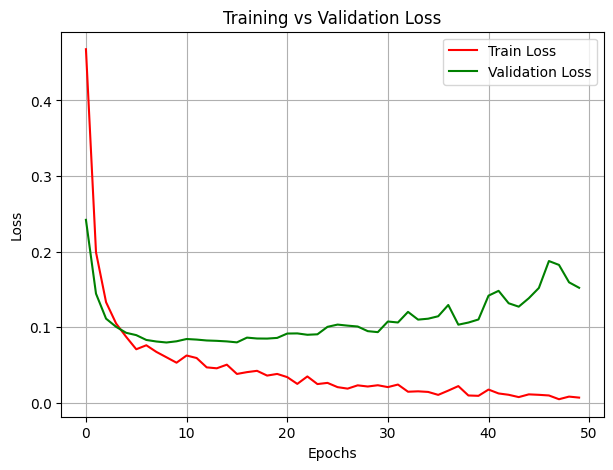

In [ ]:
# ================================================================
# 🧠 Neural Network (ANN) for Diagnosis Classification + Graphs
# ================================================================
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# ================================================================
# 1️⃣ Define Neural Network Architecture
# ================================================================
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # For binary classification
])

# ================================================================
# 2️⃣ Compile the Model
# ================================================================
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# ================================================================
# 3️⃣ Train the Model
# ================================================================
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=16,
    verbose=1
)

# ================================================================
# 4️⃣ Evaluate Model
# ================================================================
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")
acc_nn = accuracy_score(y_test, y_pred_nn)

print("\n📊 Neural Network Model Results")
print("===================================")
print(f"✅ Accuracy: {acc_nn:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn))

# ================================================================
# 5️⃣ Confusion Matrix Visualization
# ================================================================
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_nn),
            annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix - Neural Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ================================================================
# 6️⃣ Training & Validation Accuracy Graph
# ================================================================
plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# ================================================================
# 7️⃣ Training & Validation Loss Graph
# ================================================================
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
